In [7]:
using LinearAlgebra
using Pkg
using Distributions
using PyPlot

# Question 1


Given the following data of a funciton, we want to find the quadratic spline with 4 knots.

$$(x,y) = (0,0), (1,1), (2,2), (3,1), (4,0)$$


$S_{2,4}(x) =
\begin{cases} a_1 + b_1x + c_1 x^2 &x \in [0,1) \\
a_2 + b_2x + c_2 x^2 &x \in [1,2) \\
a_3 + b_3x + c_3 x^2  &x \in [2,3)\\
a_4 + b_4x + c_4 x^2  &x \in [3,4]\\
\end{cases}$
   
   
Since $S_{2,4}(x)$ interpolates the data, we need

* $a_1 = 0$
* $a_1 + b_1 + c_1 = 1$
* $a_2 + b_2 + c_2 =1$
* $a_2 + b_2 2 + c_2 4 = 2$
* $a_3 + b_3 2 + c_3 4 = 2 $
* $a_3 + b_3 3 + c_3 9=  1 $
* $a_4 + b_4 3 + c_4 9 = 1 $
* $a_4+ b_44 +c_416 = 0$

To ensure the spline is differentiable we need

* $ b_1 + 2c_1 =  b_2 + 2 c_2 $
* $ b_3  + 4c_3  = b_2  + 4c_2  $
* $ b_3 + 6c_3  =  b_4 + 6 c_4$

We focus on the natural spline where 

$c_1 = 0$

We solve the system of equations below

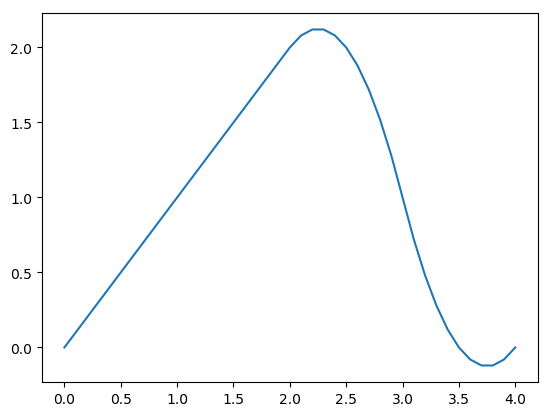

[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, -8.0, 9.0, -2.0, 28.0, -15.0, 2.0]


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f599019eba8>

In [55]:
X = [1 0 0 0 0 0 0 0 0 0 0 0; 1 1 1 0 0 0 0 0 0 0 0 0; 0 0 0 1 1 1 0 0 0 0 0 0;
    0 0 0 1 2 4 0 0 0 0 0 0;  0 0 0 0 0 0 1 2 4 0 0 0; 0 0 0 0 0 0 1 3 9 0 0 0;
    0 0 0 0 0 0  0 0 0 1 3 9;  0 0 0 0 0 0 0 0 0 1 4 16; 
    0 1 2 0 -1 -2 0 0 0 0 0 0; 0 0 0 0 1 4 0 -1 -4 0 0 0 ; 0 0 0 0 0 0 0 1 6 0 -1 -6 
    ; 0 0 1 0 0 0 0 0 0 0 0 0 ]

y = [0; 1; 1; 2; 2; 1; 1; 0; 0; 0; 0; 0]

C = inv(X)y
println(C)

function spline(x,knots,coefs)
    num_knots = length(knots)
    for i=1:(num_knots-1)
        if x <= knots[i+1]
            return coefs[3*(i-1)+1] + x*coefs[3*(i-1)+2] + x^2*coefs[3*(i-1)+3]
        end
    end
    return coefs[end-2] + x*coefs[end-1] +x^2*coefs[end]
    
end

ys = []
xs = []

for x=0:.1:4
    y = spline(x,[0;1;2;3;4],C)
    xs = append!([x],xs)
    ys = append!([y],ys)
end

plot(xs, ys)

# Question 2

We use the following approximation for an integral $\int_0^1 f(x)dx$,

$$\int_0^1 f(x) dx = w_1 f(0) + w_2 f(x_1)$$

We construct 3 equations using polynomial expressions of $x$. 

* If $f(x) = x^0$ we get, that (1) $w_1 + w_2 = 1$
* If $f(x) = x$ we get that (2) $\int_0^1 x dx = \dfrac{1}{2} = w_2 x_1$
* Finally, if $f(x) = x^2$ we get (3) $\int_0^1 x^2 dx = \dfrac{1}{3} = w_2 x_1^2$

So, solving the solution to these three equations we get that $w_1 = 3/4$, $w_2=1/4$ and $x_1=2/3$

The quadrature formula is thus

$$\int_0^1 f(x)dx = 3/4 + 1/4f(2/3)$$
 

# Question 3



# Question 4

https://math.stackexchange.com/questions/1518195/richardsons-extrapolation-of-composite-trapezoidal-rule

In [7]:
f(x) = exp(x)

function trapezint(f,a,b,N)
    h=(b-a)/N
    sum=(f(a)+f(b))/2
    for k=1:N
        sum = sum + f(a+k*h)
    end
    return sum*h
end

last = 0
for k=1:10
    N = 2^k
    intval = trapezint(f, 0.0, 1.0, N)
    println(N, intval, N*N*(last-intval), (4*intval-last)/3)
    last=intval
end

23.113072006694348-12.4522880267773924.150762675592464
42.40679236167227811.3004743203531182.171365813331588
82.060303820721682422.175266620838131.9448076404048171
161.88873374285868543.921939932927331.8315437169043527
321.803367967455672287.414554012685131.7749127089880012
641.7607899404197667174.3995987390691.7465972647411316
1281.7395271448683143348.36964231499591.7324395463511635
2561.7289023017592382696.30971799640971.7253606873895462
5121.72359151888230321392.18986649124421.721821257923325
10241.7209365371139182783.95016276626851.720051543191123


# Question 5

Let 

$$A=\{ (x,y):x2+y2 \leq 1 \} $$

We want to compute the Area(A) using Monte Carlo Integration. Since, A is circle centered at the origin and of radius 1, we know that the answer is $\pi$ and is given by the following integral

$$Area(A)=\int_A dx dy$$

If $X \sim U(−1,1)$ and $Y \sim U(−1,1)$ are independent random variables with the joint density given by 1/4 i.e. $f_{X,Y}(x,y)=1/4$ for $−1 \leq x,y \leq 1$

Let B be the square $−1 \leq x,y \leq 1$. Then we can think of the Area(A)

$$Area(A)=4P(X,Y∈A)=4\int_B \textbf{1}_A f_{X,Y} dx dy = 4E[\textbf{1}_A]$$

In [2]:
for n=[100,400,1600]
    draws = rand(Uniform(-1,1), 2,n)
    inside_disc = 1 .*(draws[1,:].^2 + draws[2,:].^2 .<= 1)
    println("n: $(n), monte carlo pi: $(4*sum(inside_disc)/n)")
end

n: 100, monte carlo pi: 3.28
n: 400, monte carlo pi: 3.13
n: 1600, monte carlo pi: 3.1725


# Question 6

We solve for the gradient analytically and then stochastic gradient descent to find the optimimum

$$\nabla f_1 = \begin{bmatrix} 2x- 2 &  2y \end{bmatrix}$$
$$\nabla f_2 = \begin{bmatrix} 2x+ 2 &  2y \end{bmatrix}$$
$$\nabla f_3 = \begin{bmatrix} 2x &  2y -2\end{bmatrix}$$
$$\nabla f_4 = \begin{bmatrix} 2x &  2y +2\end{bmatrix}$$

In [112]:
obj = 0 
obj_grad = 0
alpha = .2
obj_grads(x) = [2x[1]-2 2*x[2]; 2x[1]+2 2*x[2] ; 2x[1] 2*x[2]-2 ; 2x[1] 2*x[2]+2 ]

x = [5,5]
for i=1:10
    index = rand(1:4)
    test = false
    
    if test
        println("pre update ", x)
        println(obj_grads(x))
        println(index)
        println(obj_grads(x)[index,:])
        

    end
    x = x - alpha*(obj_grads(x)[index,:])
    
    if test
        println("update ",x)
        println("----")
    end
end

print(x)

[0.167067, 0.181745]